In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn-bright')

import pickle
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics

from IPython.display import display
%load_ext memory_profiler
%load_ext line_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [4]:
def train_test_split(dataX, datay, proportion_train = .75):
    train_cutoff = int(np.floor(proportion_train*len(dataX)))

    X_train = dataX[:train_cutoff]
    X_test  = dataX[train_cutoff:]

    y_train = datay[:train_cutoff]
    y_test  = datay[train_cutoff:]

    return X_train, y_train, X_test, y_test

def feature_target_split(df,feature_names, target_name):
    X_data = df[feature_names].as_matrix()
    y_data = df[target_name].as_matrix()
    return X_data, y_data

[[ 5.22438027  5.69746879]]
[-1.34873321]


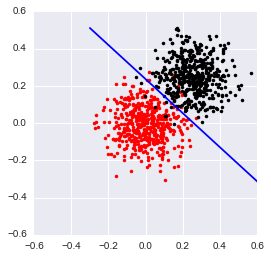

In [17]:
# plotting the decision boundary of logistic regression
np.random.seed(0)
mu, sigma = 0, 0.1 # mean and standard deviation
x0 = np.random.normal(mu, sigma, 500)
y0 = np.random.normal(mu, sigma, 500)

df1 = pd.DataFrame({'x':x0, 'y':y0, 'label':0})

mu, sigma = 0.25, 0.1 # mean and standard deviation
x1 = np.random.normal(mu, sigma, 500)
y1 = np.random.normal(mu, sigma, 500)

df2 = pd.DataFrame({'x':x1, 'y':y1, 'label':1})

df = pd.concat([df1,df2])
df
######
X_data, y_data = feature_target_split(df,['x','y'],'label')
model = svm.LinearSVC()
model.fit(X_data,y_data)
print model.coef_
print model.intercept_

plt.plot(x0,y0,'r.')
plt.plot(x1,y1,'k.')

m = - model.coef_[0][0] / model.coef_[0][1]
c = - model.intercept_[0] / model.coef_[0][1]

xx = np.linspace(-.3, .7)
yy = m * xx + c

plt.plot(xx, yy, 'b-')
plt.xlim(-.6, .6)
plt.ylim(-.6, .6)
plt.gca().set_aspect('equal', adjustable='box')